In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

# Intro and Basic stuff

In [2]:
pd.set_option("display.max_columns", None)  #to display all the columns
aviadata = pd.read_csv('AviationData.csv')
aviadata.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  2.02102E+13           Accident      CEN21FA130  2021-02-16   
1  2.02102E+13           Accident      ERA21FA130  2021-02-15   
2  2.02102E+13           Accident      ANC21LA017  2021-02-13   
3  2.02102E+13           Accident      CEN21LA127  2021-02-12   
4  2.02102E+13           Accident      ERA21LA131  2021-02-10   

             LOCATION        Country   Latitude   Longitude Airport.Code  \
0      JANESVILLE, WI  United States  42.595377  -89.030245          NaN   
1       St Thomas, CB  United States  18.354444  -65.027778          NaN   
2          TYONEK, AK  United States  61.336392 -152.016430          NaN   
3  PRAIRIE DU SAC, WI  United States  43.297731  -89.755693          91C   
4     LAKE PLACID, FL  United States  27.243723  -81.413767         09FA   

   Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0           NaN           Fatal     Substantial          Airplane   
1           NaN           Fatal       Destroyed        Helicopter   
2           NaN           Minor     Substantial          Airplane   
3  SAUK-PRAIRIE       Non-Fatal     Substantial          Airplane   
4           NaN           Minor     Substantial          Airplane   

  Registration.Number      Make    Model Amateur.Built  Number.of.Engines  \
0               N13VT  Velocity    Vtwin            No                2.0   
1               N13AT      Bell      206            No                1.0   
2              N56517     Maule  M-6-235            No                1.0   
3              N3477E    Cessna     172N            No                1.0   
4              N8183C     Piper    PA-18            No                1.0   

  Engine.Type FAR.Description Schedule Purpose.of.flight  \
0         NaN              91      NaN             Ferry   
1         NaN              91      NaN              Aobv   
2         NaN              91      NaN          Personal   
3         NaN              91      NaN     Instructional   
4         NaN              91      NaN          Personal   

                      Air.carrier  Total.Fatal.Injuries  \
0                             NaN                   2.0   
1  Caribbean Buzz Management Llc.                   4.0   
2                    Paul Andrews                   0.0   
3                             NaN                   0.0   
4                     Case Robert                   0.0   

   Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
0                     0.0                   0.0              0.0   
1                     0.0                   0.0              0.0   
2                     0.0                   2.0              0.0   
3                     0.0                   0.0              1.0   
4                     0.0                   1.0              0.0   

  Weather.Condition Broad.phase.of.flight Report.Status Publication.Date  
0               VMC                   NaN           NaN              NaN  
1               VMC                   NaN           NaN              NaN  
2               NaN                   NaN           NaN              NaN  
3               VMC                   NaN           NaN              NaN  
4               NaN                   NaN           NaN              NaN

In [3]:
print("Data type : ", type(aviadata))
print("Data dims : ", aviadata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (85976, 31)


In [4]:
print(aviadata.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
LOCATION                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [5]:
aviadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

# Intro to Cleaning and how we chose our variables

In [6]:
s = (aviadata.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'LOCATION', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [7]:
missing = aviadata.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Air.carrier               81385
Schedule                  73797
FAR.Description           57047
Aircraft.Category         56750
Longitude                 54398
Latitude                  54389
Airport.Code              37364
Airport.Name              34678
Total.Serious.Injuries    30510
Total.Minor.Injuries      29281
Total.Fatal.Injuries      27818
Publication.Date          15650
Total.Uninjured           14884
Broad.phase.of.flight      7594
Number.of.Engines          5577
Purpose.of.flight          5392
Engine.Type                5104
Registration.Number        4220
Weather.Condition          3672
Aircraft.damage            2929
Report.Status               993
Amateur.Built               680
Country                     507
Injury.Severity             134
Model                        99
LOCATION                     78
Make                         68
Investigation.Type           13
dtype: int64

In [8]:
#categorical_columns = aviadata.select_dtypes(include=['object']).columns
#aviadata[categorical_columns] = aviadata[categorical_columns].fillna("UNK")
#aviadata = aviadata.fillna("UNK")
#aviadata.head()

In [9]:
print("Number of Categories for the following variables: \n")

print("Location:", len(aviadata["LOCATION"].dropna().unique()))
print("Airport Codes:", len(aviadata["Airport.Code"].dropna().unique()))
print("Airport Names:", len(aviadata["Airport.Name"].dropna().unique()))
print("Make:", len(aviadata["Make"].dropna().unique()))
print("Model:", len(aviadata["Model"].dropna().unique()))
print("Air carrier:", len(aviadata["Air.carrier"].dropna().unique()))

print(" \n")

print("Investigation Type:", len(aviadata["Investigation.Type"].dropna().unique()))

print(" \n")

print("Countries:", len(aviadata["Country"].dropna().unique()))
print("Injury Severity:", len(aviadata["Injury.Severity"].dropna().unique()))
print("Aircraft Damage:", len(aviadata["Aircraft.damage"].dropna().unique()))
print("Aircraft Category:", len(aviadata["Aircraft.Category"].dropna().unique()))
print("Amateur Built:", len(aviadata["Amateur.Built"].dropna().unique()))
print("Engine Type:", len(aviadata["Engine.Type"].dropna().unique()))
print("Purpose of flight:", len(aviadata["Purpose.of.flight"].dropna().unique()))
print("Weather Condition:", len(aviadata["Weather.Condition"].dropna().unique()))
print("Broad phase of flight:", len(aviadata["Broad.phase.of.flight"].dropna().unique()))
print("Report Status:", len(aviadata["Report.Status"].dropna().unique()))

Number of Categories for the following variables: 

Location: 23837
Airport Codes: 10106
Airport Names: 24188
Make: 7261
Model: 12065
Air carrier: 3226
 

Investigation Type: 2
 

Countries: 185
Injury Severity: 132
Aircraft Damage: 3
Aircraft Category: 13
Amateur Built: 2
Engine Type: 16
Purpose of flight: 34
Weather Condition: 4
Broad phase of flight: 12
Report Status: 4


## Cleaning up data and EDA

### Understanding the variables we are focussing on

Class of Investigation Type: 2
Accident    82286
Incident     3677
Name: Investigation.Type, dtype: int64


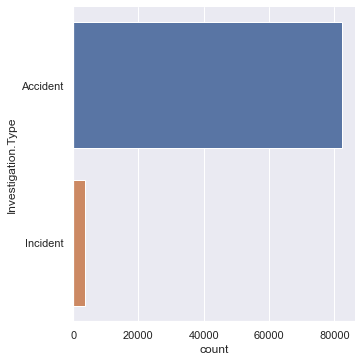

In [10]:
# (i) Classes of Investigation Type
print("Class of Investigation Type:", len(aviadata["Investigation.Type"].dropna().unique()))

# Count plot for classes of Investigation Type
print(aviadata["Investigation.Type"].value_counts())
sns.catplot(y = "Investigation.Type", data = aviadata, kind = "count")

Class of Aircraft damage: 3
Substantial    62014
Destroyed      18275
Minor           2758
Name: Aircraft.damage, dtype: int64


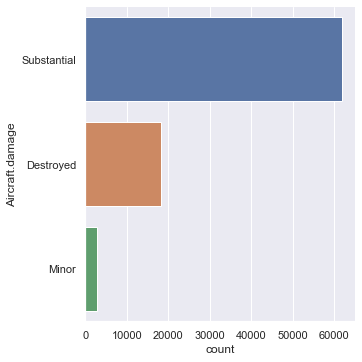

In [11]:
# (ii) Classes of Aircraft Damage
print("Class of Aircraft damage:", len(aviadata["Aircraft.damage"].dropna().unique()))

# Count plot for classes of Aircraft Damage
print(aviadata["Aircraft.damage"].value_counts())
sns.catplot(y = "Aircraft.damage", data = aviadata, kind = "count")

### Point of interest: Injury Severity

In [12]:
# (iii) Injury Severity 

## First we need to clean the variable

aviadata["Injury.Severity"].unique()

array(['Fatal', 'Minor', 'Non-Fatal', 'Siruose', nan, 'Unavailable',
       'Incident', 'Fatal(1)', 'Fatal(2)', 'Fatal(8)', 'Fatal(5)',
       'Fatal(3)', 'Fatal(4)', 'Fatal(9)', 'Fatal(176)', 'Fatal(7)',
       'Fatal(29)', 'Fatal(6)', 'Fatal(10)', 'Fatal(11)', 'Fatal(14)',
       'Fatal(41)', 'Fatal(157)', 'Fatal(188)', 'Fatal(112)', 'Fatal(71)',
       'Fatal(12)', 'Fatal(39)', 'Fatal(16)', 'Fatal(66)', 'Fatal(62)',
       'Fatal(23)', 'Fatal(224)', 'Fatal(150)', 'Fatal(43)', 'Fatal(162)',
       'Fatal(58)', 'Fatal(295)', 'Fatal(239)', 'Fatal(33)', 'Fatal(50)',
       'Fatal(21)', 'Fatal(19)', 'Fatal(153)', 'Fatal(127)', 'Fatal(28)',
       'Fatal(77)', 'Fatal(42)', 'Fatal(158)', 'Fatal(103)', 'Fatal(89)',
       'Fatal(90)', 'Fatal(152)', 'Fatal(228)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(24)', 'Fatal(88)', 'Fatal(65)', 'Fatal(154)', 'Fatal(30)',
       'Fatal(20)', 'Fatal(40)', 'Fatal(57)', 'Fatal(199)', 'Fatal(114)',
       'Fatal(102)', 'Fatal(96)', 'Fatal(49)', 'Fatal(124)'

In [13]:
## Over here we fix the 'Fatal' categories and misspelt 'Serious'

for num in range(400):
    aviadata["Injury.Severity"] = np.where(aviadata["Injury.Severity"]=="Fatal({})".format(num), "Fatal", aviadata["Injury.Severity"])
    
aviadata["Injury.Severity"] = np.where(aviadata["Injury.Severity"]=="Siruose", "Serious", aviadata["Injury.Severity"])

aviadata["Injury.Severity"] = np.where(aviadata["Injury.Severity"]=="Unavailable".format(), "UNK", aviadata["Injury.Severity"])


aviadata["Injury.Severity"].unique()

array(['Fatal', 'Minor', 'Non-Fatal', 'Serious', nan, 'UNK', 'Incident'],
      dtype=object)

Class of Injury Severity: 6
Non-Fatal    64385
Fatal        17275
Incident      3652
UNK            307
Minor          122
Serious        101
Name: Injury.Severity, dtype: int64


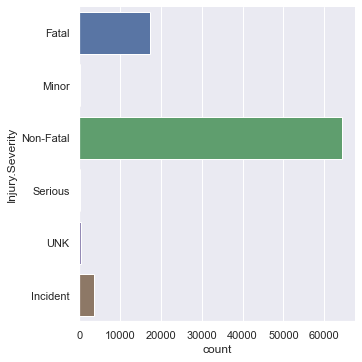

In [14]:
# Classes of Injury Severity
print("Class of Injury Severity:", len(aviadata["Injury.Severity"].dropna().unique()))

# Count plot for classes of Injury Severity
print(aviadata["Injury.Severity"].value_counts())
sns.catplot(y = "Injury.Severity", data = aviadata, kind = "count")

Engine Types: 16
Reciprocating       68664
Turbo Shaft          3541
Turbo Prop           3345
Turbo Fan            2463
UNK                  2057
Turbo Jet             707
REC                    37
None                   18
Geared Turbofan        11
Electric                9
TS                      8
TP                      6
TF                      3
REC, TJ, TJ             1
Hybrid Rocket           1
TJ, REC, REC, TJ        1
Name: Engine.Type, dtype: int64


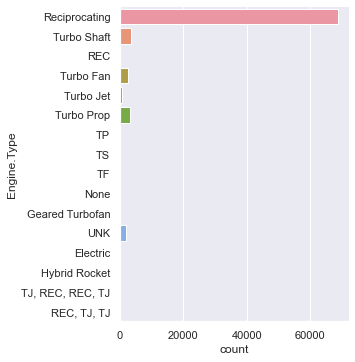

In [15]:
# (iv) Engine Type 

print("Engine Types:", len(aviadata["Engine.Type"].dropna().unique()))


aviadata["Engine.Type"] = np.where(aviadata["Engine.Type"]=="Unknown".format(), "UNK", aviadata["Engine.Type"])

# Count plot for types of Engines
print(aviadata["Engine.Type"].value_counts())
sns.catplot(y = "Engine.Type", data = aviadata, kind = "count")

Aircraft Categories: 5
Airplane        25080
Helicopter       3076
Glider            473
Balloon           209
Weight-Shift      109
Name: Aircraft.Category, dtype: int64


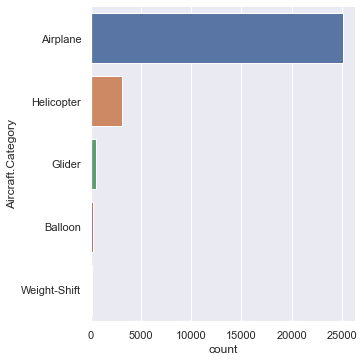

In [16]:
# (v) Aircraft Category

counts = aviadata['Aircraft.Category'].value_counts()

aviadata = aviadata.loc[aviadata['Aircraft.Category'].isin(counts.index[counts > 100])]

print("Aircraft Categories:", len(aviadata["Aircraft.Category"].dropna().unique()))

# Count plot for Categories of Aircraft
print(aviadata["Aircraft.Category"].value_counts())
sns.catplot(y = "Aircraft.Category", data = aviadata, kind = "count")

How many are of Amateur Build? 2
No     25370
Yes     3123
Name: Amateur.Built, dtype: int64


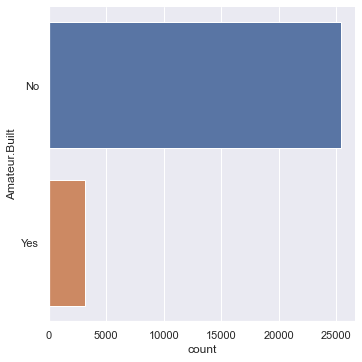

In [17]:
# (vi) Amateur Build
print("How many are of Amateur Build?", len(aviadata["Amateur.Built"].dropna().unique()))

# Count plot for Amatuer Build
print(aviadata["Amateur.Built"].value_counts())
sns.catplot(y = "Amateur.Built", data = aviadata, kind = "count")

In [18]:
# (vii) Purpose of Flight

counts = aviadata['Purpose.of.flight'].value_counts()
print(aviadata["Purpose.of.flight"].value_counts())


Personal                     15858
Instructional                 3502
Aerial Application            1277
Unknown                       1111
Business                       903
Positioning                    495
Other Work Use                 320
Aerial Observation             297
Flight Test                    245
Ferry                          191
Skydiving                      158
Executive/corporate            156
Air Race/show                  119
External Load                   90
Banner Tow                      83
Public Aircraft - Federal       77
Pers                            74
Public Aircraft - Local         64
Public Aircraft                 60
Public Aircraft - State         54
Glider Tow                      44
Firefighting                    25
Aapl                             9
Air Drop                         8
Inst                             8
Bus                              7
Aobv                             5
Exld                             4
Firf                

How is the data split up according to Purpose of flight? 13
Personal               15858
Instructional           3502
Aerial Application      1277
Unknown                 1111
Business                 903
Positioning              495
Other Work Use           320
Aerial Observation       297
Flight Test              245
Ferry                    191
Skydiving                158
Executive/corporate      156
Air Race/show            119
Name: Purpose.of.flight, dtype: int64


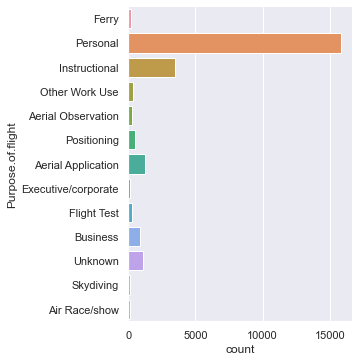

In [19]:
aviadata = aviadata.loc[aviadata['Purpose.of.flight'].isin(counts.index[counts > 100])]

print("How is the data split up according to Purpose of flight?", len(aviadata["Purpose.of.flight"].dropna().unique()))

# Count plot for Purpose of Flight
print(aviadata["Purpose.of.flight"].value_counts())
sns.catplot(y = "Purpose.of.flight", data = aviadata, kind = "count")

<ipython-input-20-dc8ea635efeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviadata["Weather.Condition"] = np.where(aviadata["Weather.Condition"]=="Unk".format(), "UNK", aviadata["Weather.Condition"])


Weather conditions break up:  3
VMC    22430
IMC     1187
UNK      274
Name: Weather.Condition, dtype: int64


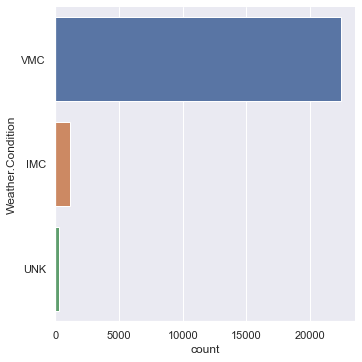

In [20]:
# (viii) Weather Conditions

aviadata["Weather.Condition"] = np.where(aviadata["Weather.Condition"]=="Unk".format(), "UNK", aviadata["Weather.Condition"])

print("Weather conditions break up: " , len(aviadata["Weather.Condition"].dropna().unique()))

# Count plot for Weather Conditions
print(aviadata["Weather.Condition"].value_counts())
sns.catplot(y = "Weather.Condition", data = aviadata, kind = "count")


Report Status: 4
Probable Cause    21333
Preliminary        1035
Foreign             958
Factual             593
Name: Report.Status, dtype: int64


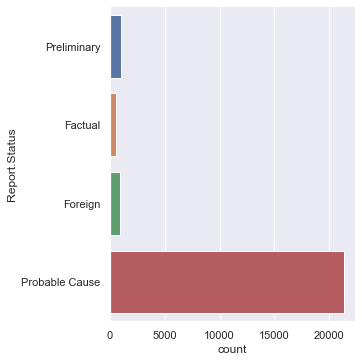

In [21]:
# (ix) Report Status
print("Report Status:", len(aviadata["Report.Status"].dropna().unique()))

# Count plot for REPORT STATUS
print(aviadata["Report.Status"].value_counts())
sns.catplot(y = "Report.Status", data = aviadata, kind = "count")

In [22]:
# (x) Countries where accidents occured 

counts = aviadata['Country'].value_counts()
print("Countries:", len(aviadata['Country'].dropna().unique()))
print(aviadata['Country'].value_counts())

Countries: 109
United States     23615
Brazil              138
Mexico               61
United Kingdom       56
France               51
                  ...  
Pakistan              1
French Guiana         1
Namibia               1
Greenland             1
Congo                 1
Name: Country, Length: 109, dtype: int64


Countries: 2
United States    23615
Brazil             138
Name: Country, dtype: int64


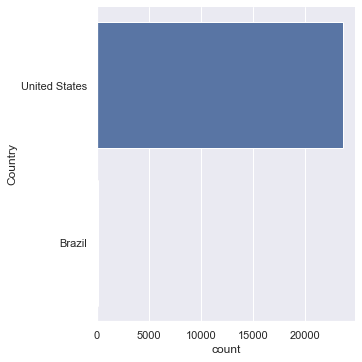

In [23]:
aviadata = aviadata.loc[aviadata['Country'].isin(counts.index[counts > 80])]

print("Countries:", len(aviadata['Country'].dropna().unique()))
print(aviadata['Country'].value_counts())


accidents = aviadata['Country'].groupby(aviadata['Country']).count()
sns.catplot(y = "Country", data = aviadata, kind = "count")

## Continuation of EDA
### Understanding Injuries over time

# !! We need to come back to this !!

In [24]:
aviadata['Event.Date'] = pd.to_datetime(aviadata['Event.Date'], infer_datetime_format = True)
aviadata=aviadata.set_index('Event.Date')



<ipython-input-24-15174394b6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviadata['Event.Date'] = pd.to_datetime(aviadata['Event.Date'], infer_datetime_format = True)


<AxesSubplot:xlabel='Event.Date'>

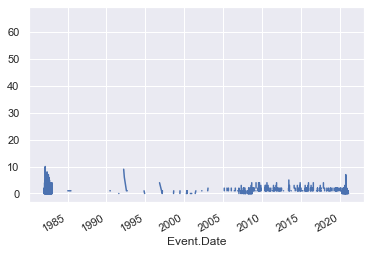

In [25]:
aviadata['Total.Serious.Injuries'].plot.line()

<AxesSubplot:xlabel='Event.Date'>

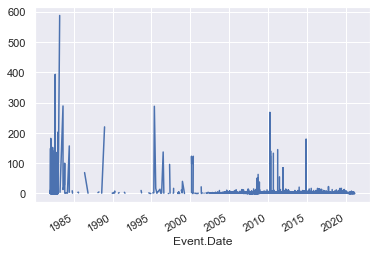

In [26]:
aviadata['Total.Uninjured'].plot.line()

## We can investigate this

<AxesSubplot:xlabel='Event.Date'>

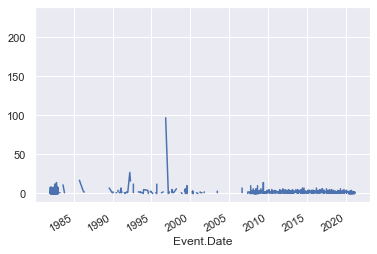

In [27]:
aviadata['Total.Fatal.Injuries'].plot.line()

## Numeric analysis possibilities

In [28]:
aviadata2 = pd.DataFrame(aviadata['Total.Fatal.Injuries']+aviadata['Total.Serious.Injuries']+aviadata['Total.Minor.Injuries'])
aviadata2 = aviadata2.rename(columns={0:"Injuries/Fatalities"})
aviation = pd.concat([aviadata,aviadata2], axis=1)
aviation.head()

Event.Id Investigation.Type Accident.Number  \
Event.Date                                                   
2021-02-16  2.02102E+13           Accident      CEN21FA130   
2021-02-13  2.02102E+13           Accident      ANC21LA017   
2021-02-12  2.02102E+13           Accident      CEN21LA127   
2021-02-10  2.02102E+13           Accident      ERA21LA131   
2021-02-08  2.02102E+13           Accident      WPR21LA108   

                      LOCATION        Country   Latitude   Longitude  \
Event.Date                                                             
2021-02-16      JANESVILLE, WI  United States  42.595377  -89.030245   
2021-02-13          TYONEK, AK  United States  61.336392 -152.016430   
2021-02-12  PRAIRIE DU SAC, WI  United States  43.297731  -89.755693   
2021-02-10     LAKE PLACID, FL  United States  27.243723  -81.413767   
2021-02-08        SARATOGA, WY  United States  42.100000 -107.580000   

           Airport.Code  Airport.Name Injury.Severity Aircraft.damage  \
Event.Date                                                              
2021-02-16          NaN           NaN           Fatal     Substantial   
2021-02-13          NaN           NaN           Minor     Substantial   
2021-02-12          91C  SAUK-PRAIRIE       Non-Fatal     Substantial   
2021-02-10         09FA           NaN           Minor     Substantial   
2021-02-08          NaN           NaN           Minor     Substantial   

           Aircraft.Category Registration.Number          Make  \
Event.Date                                                       
2021-02-16          Airplane               N13VT      Velocity   
2021-02-13          Airplane              N56517         Maule   
2021-02-12          Airplane              N3477E        Cessna   
2021-02-10          Airplane              N8183C         Piper   
2021-02-08          Airplane              N7569A  Abbett Gerry   

                        Model Amateur.Built  Number.of.Engines Engine.Type  \
Event.Date                                                                   
2021-02-16              Vtwin            No                2.0         NaN   
2021-02-13            M-6-235            No                1.0         NaN   
2021-02-12               172N            No                1.0         NaN   
2021-02-10              PA-18            No                1.0         NaN   
2021-02-08  LANCAIR EVOLUTION           Yes                1.0         NaN   

           FAR.Description Schedule Purpose.of.flight   Air.carrier  \
Event.Date                                                            
2021-02-16              91      NaN             Ferry           NaN   
2021-02-13              91      NaN          Personal  Paul Andrews   
2021-02-12              91      NaN     Instructional           NaN   
2021-02-10              91      NaN          Personal   Case Robert   
2021-02-08              91      NaN          Personal  Gerry Abbett   

            Total.Fatal.Injuries  Total.Serious.Injuries  \
Event.Date                                                 
2021-02-16                   2.0                     0.0   
2021-02-13                   0.0                     0.0   
2021-02-12                   0.0                     0.0   
2021-02-10                   0.0                     0.0   
2021-02-08                   0.0                     0.0   

            Total.Minor.Injuries  Total.Uninjured Weather.Condition  \
Event.Date                                                            
2021-02-16                   0.0              0.0               VMC   
2021-02-13                   2.0              0.0               NaN   
2021-02-12                   0.0              1.0               VMC   
2021-02-10                   1.0              0.0               NaN   
2021-02-08                   2.0              0.0               VMC   

           Broad.phase.of.flight Report.Status Publication.Date  \
Event.Date                                                        
20

In [29]:
Injuries = pd.DataFrame(aviation['Injuries/Fatalities'])
print("Data type : ", type(Injuries))
print("Data dims : ", Injuries.size)
Injuries.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  23753


Injuries/Fatalities
Event.Date                     
2021-02-16                  2.0
2021-02-13                  2.0
2021-02-12                  0.0
2021-02-10                  1.0
2021-02-08                  2.0

In [30]:
Injuries.describe()

Injuries/Fatalities
count          4505.000000
mean              0.886349
std               2.311058
min               0.000000
25%               0.000000
50%               0.000000
75%               1.000000
max             103.000000

<AxesSubplot:>

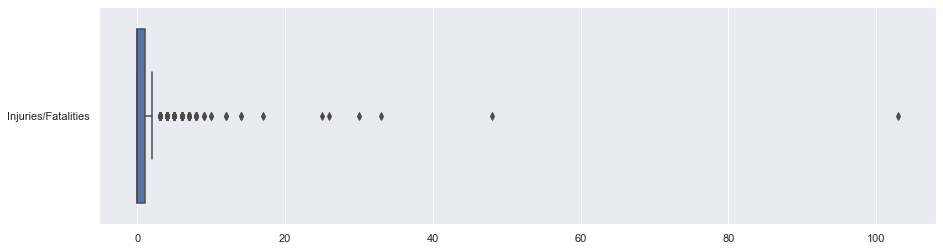

In [31]:
f = plt.figure(figsize=(15, 4))
sns.boxplot(data = Injuries, orient = "h")

<AxesSubplot:ylabel='Density'>

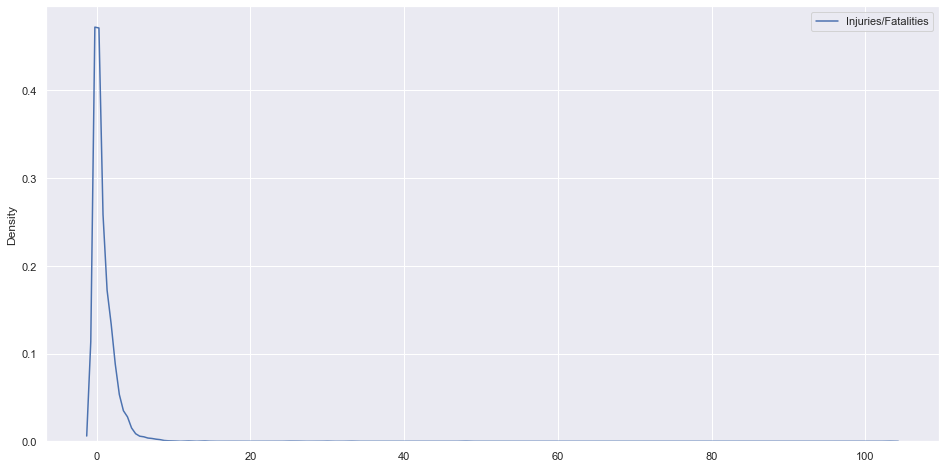

In [32]:
f = plt.figure(figsize=(16, 8))
sns.kdeplot(data = Injuries)

<AxesSubplot:>

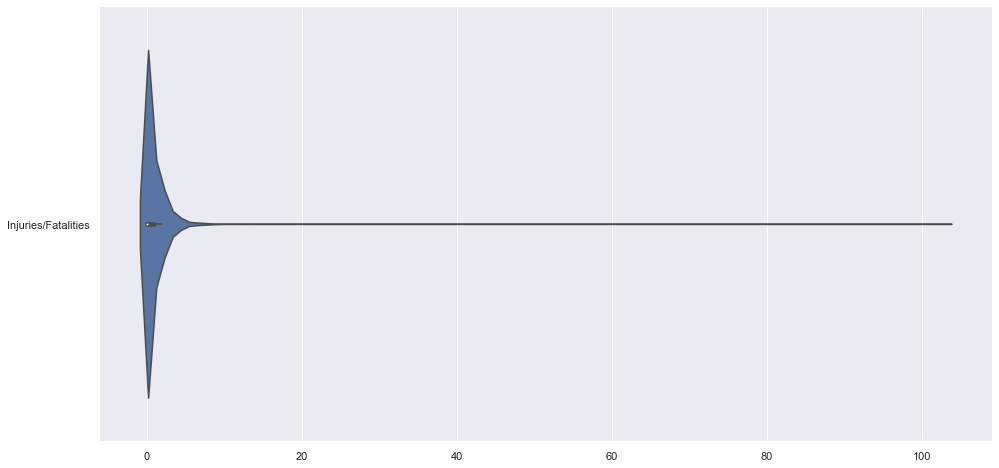

In [33]:
f = plt.figure(figsize=(16, 8))
sns.violinplot(data = Injuries, orient = "h")

# We have now decided on focussing on 'Injury Severity' and other Categorical Variables

## Pattern Recognition

C:\Users\wongt\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


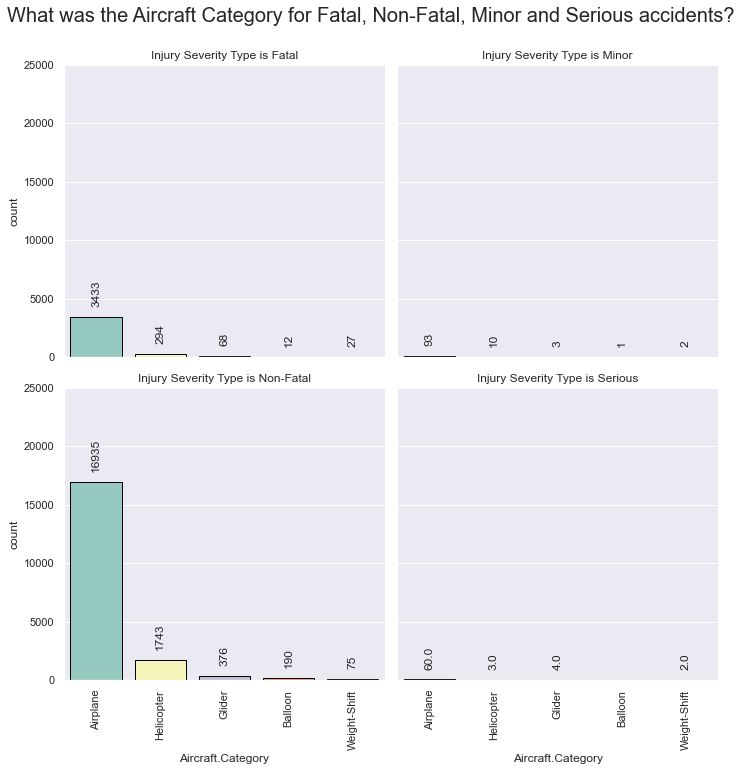

In [34]:
# (i) Countplot of Injury Severity Categories and Aircraft Categories

cplot = sns.catplot(x="Aircraft.Category", col="Injury.Severity", kind="count", col_wrap=2,
            data=aviation[aviation['Injury.Severity'].isin(['Fatal','Non-Fatal', 'Minor', 'Serious'])], height=5,
                 legend_out=True, size=5, palette="Set3", edgecolor=(0,0,0))
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("What was the Aircraft Category for Fatal, Non-Fatal, Minor and Serious accidents?", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}")
cplot.set(ylim=[0,25000])
for ax in cplot.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, 
        p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=12)
plt.show()

C:\Users\wongt\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


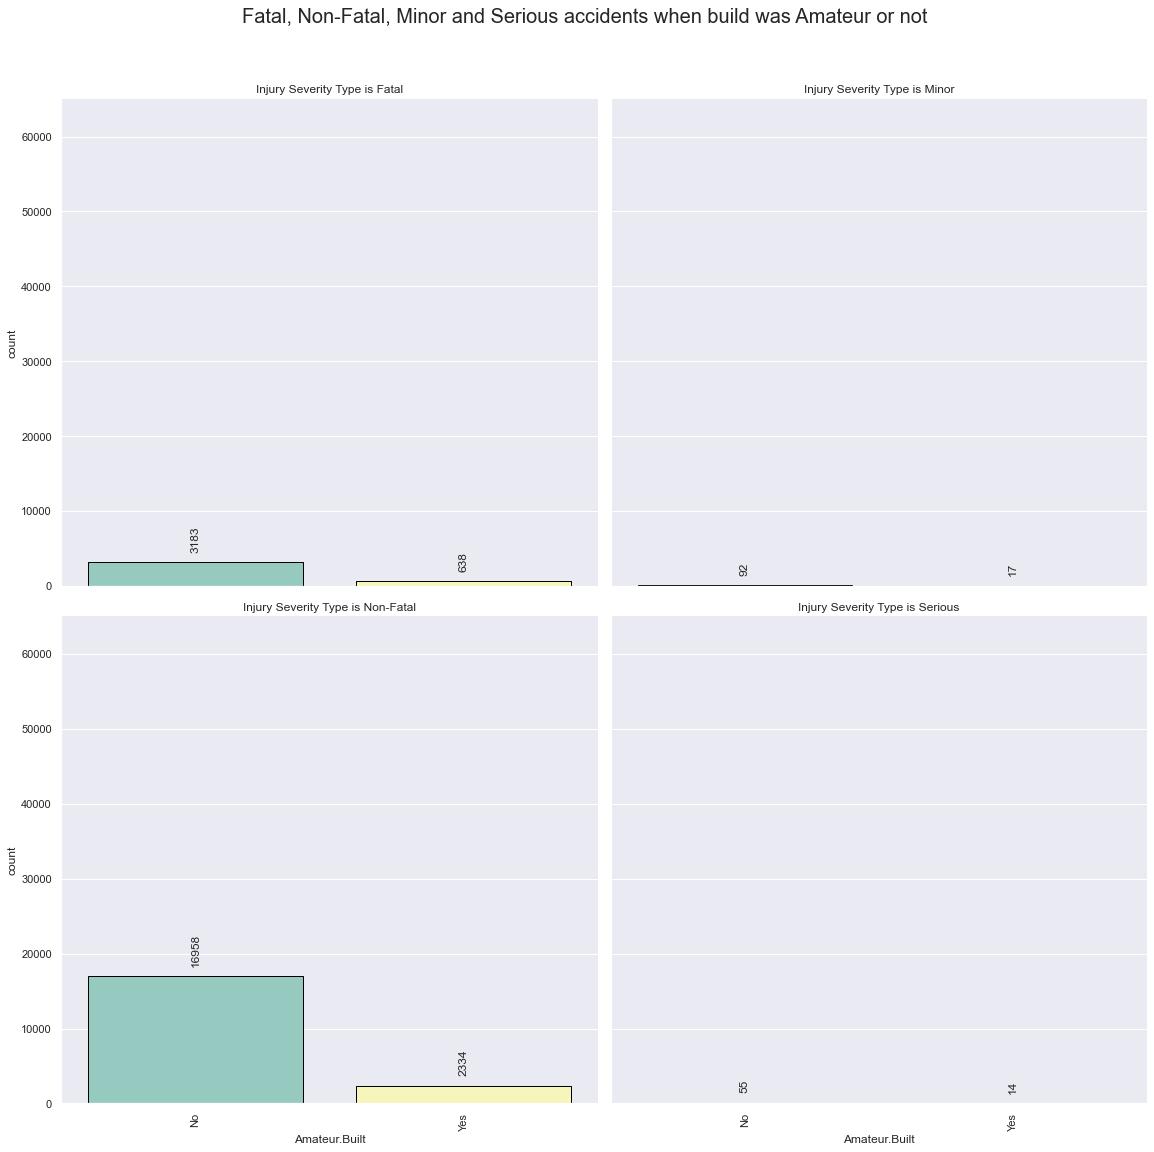

In [35]:
# (ii) Countplot of Injury Severity Categories and Amateur Built Categories

cplot = sns.catplot(x="Amateur.Built", col="Injury.Severity", kind="count", col_wrap=2,
            data=aviation[aviation['Injury.Severity'].isin(['Fatal','Non-Fatal', 'Minor', 'Serious'])], height=5,
                 legend_out=True, size=8, palette="Set3", edgecolor=(0,0,0))
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("Fatal, Non-Fatal, Minor and Serious accidents when build was Amateur or not", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}")
cplot.set(ylim=[0,65000])
for ax in cplot.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, 
        p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=12)
plt.show()

C:\Users\wongt\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


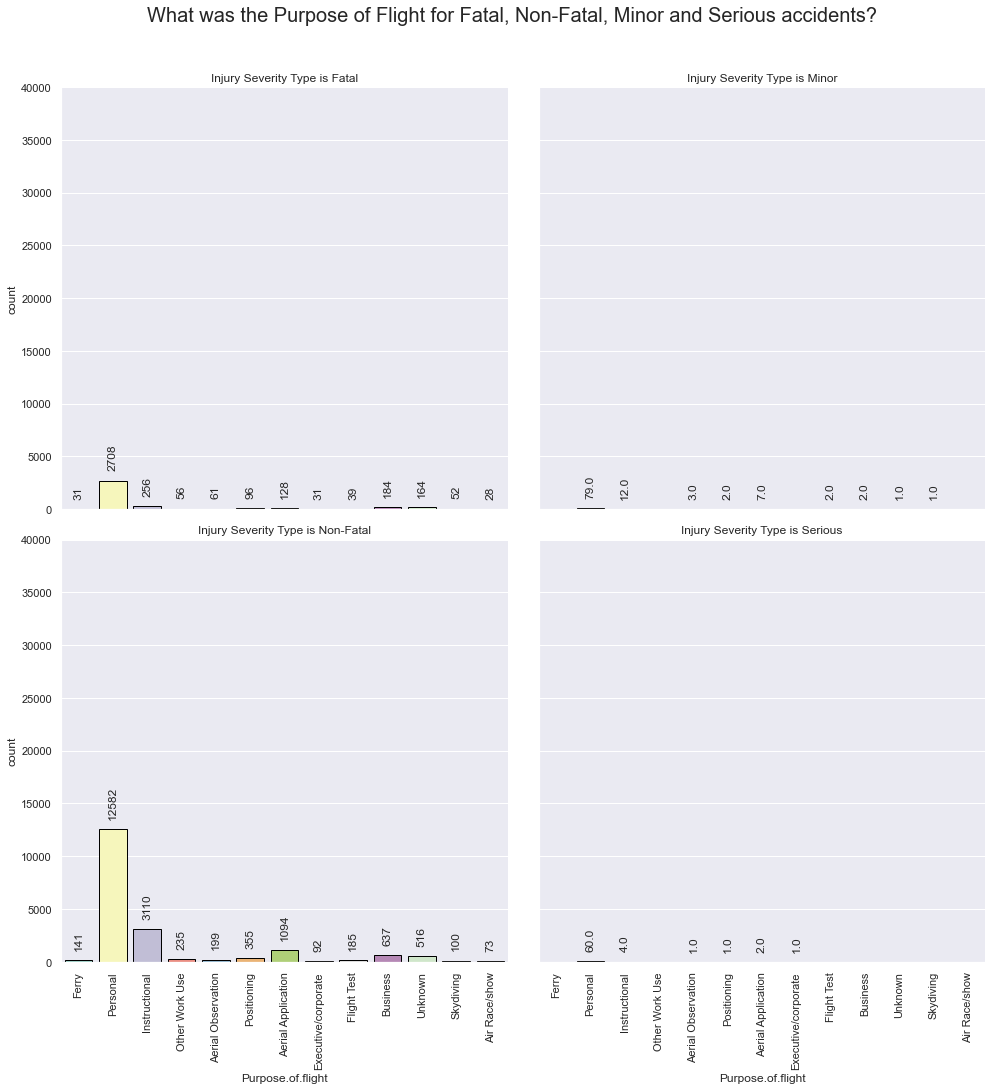

In [36]:
# (iii) Countplot of Injury Severity Categories and Purpose of Flight Categories

cplot = sns.catplot(x="Purpose.of.flight", col="Injury.Severity", kind="count", col_wrap=2,
            data=aviation[aviation['Injury.Severity'].isin(['Fatal','Non-Fatal', 'Minor', 'Serious'])], height=1,
                 legend_out=True, size=7, palette="Set3", edgecolor=(0,0,0))
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("What was the Purpose of Flight for Fatal, Non-Fatal, Minor and Serious accidents?", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}")
cplot.set(ylim=[0,40000])
for ax in cplot.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, 
        p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=12)
plt.show()

C:\Users\wongt\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


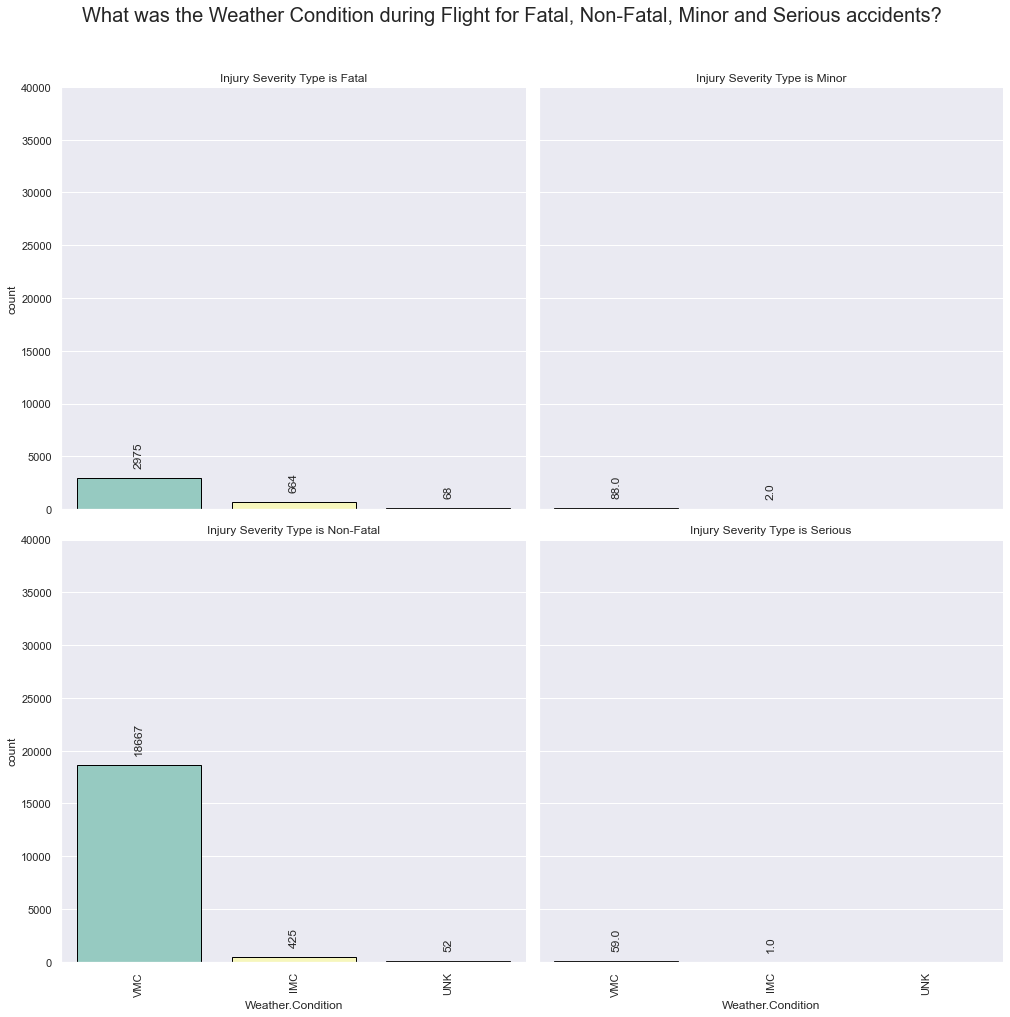

In [37]:
# (iv) Countplot of Injury Severity Categories and Weather Condition Categories

cplot = sns.catplot(x="Weather.Condition", col="Injury.Severity", kind="count", col_wrap=2,
            data=aviation[aviation['Injury.Severity'].isin(['Fatal','Non-Fatal', 'Minor', 'Serious'])], height=1,
                 legend_out=True, size=7, palette="Set3", edgecolor=(0,0,0))
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("What was the Weather Condition during Flight for Fatal, Non-Fatal, Minor and Serious accidents?", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}")
cplot.set(ylim=[0,40000])
for ax in cplot.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, 
        p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=12)
plt.show()

C:\Users\wongt\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


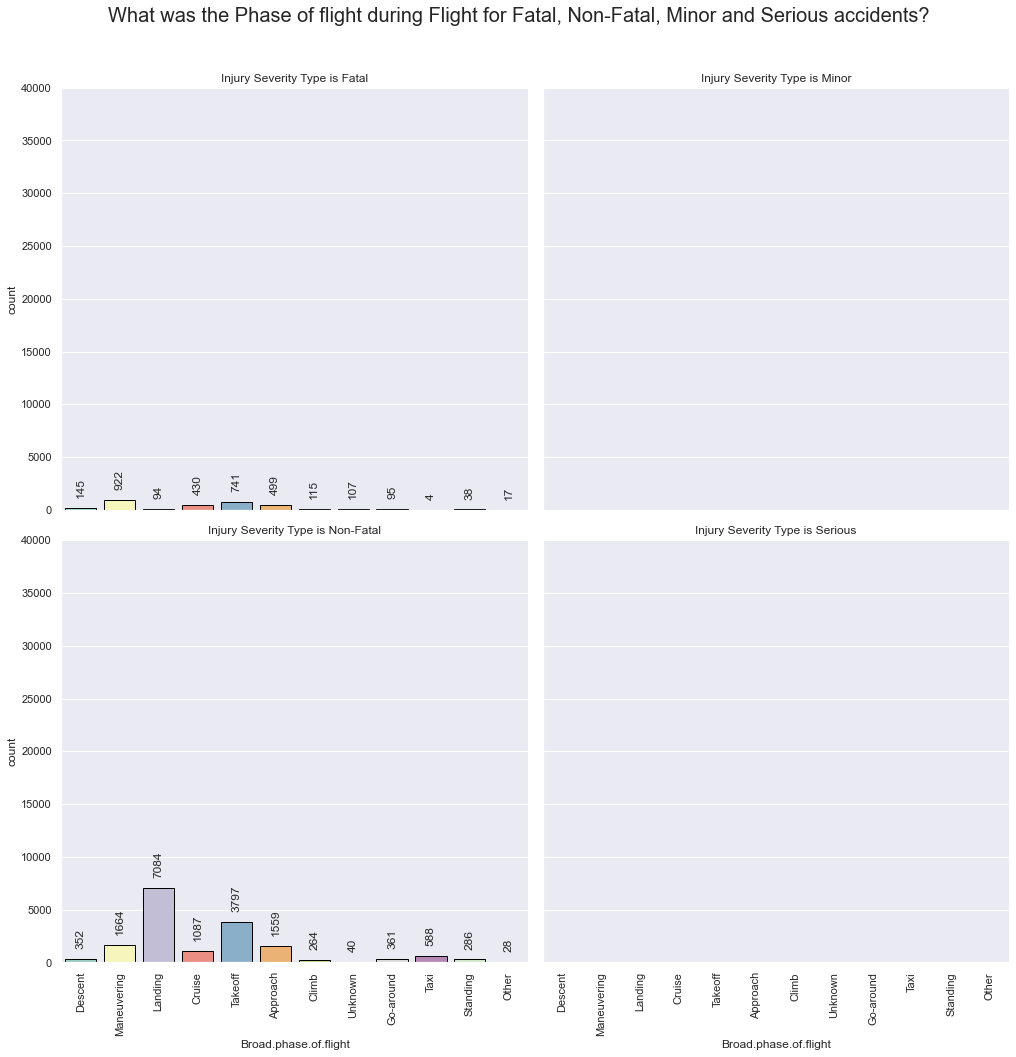

In [38]:
# (v) Countplot of Injury Severity Categories and Phase of Flight Categories

cplot = sns.catplot(x="Broad.phase.of.flight", col="Injury.Severity", kind="count", col_wrap=2,
            data=aviation[aviation['Injury.Severity'].isin(['Fatal','Non-Fatal', 'Minor', 'Serious'])], height=1,
                 legend_out=True, size=7, palette="Set3", edgecolor=(0,0,0))
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("What was the Phase of flight during Flight for Fatal, Non-Fatal, Minor and Serious accidents?", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}")
cplot.set(ylim=[0,40000])
for ax in cplot.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, 
        p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=12)
plt.show()


# Machine Learning


## (i) Cramer's V Correlation for Categorical Variables

In [39]:
aviation_catvariables = aviation[[i for i in aviation.columns if i not in ('Event.Id', 'LOCATION','Accident.Number','Event.Date','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status', 'Publication.Date', 'Injuries/Fatalities' )]]

aviation_catvariables.head()

Investigation.Type        Country Injury.Severity Aircraft.damage  \
Event.Date                                                                     
2021-02-16           Accident  United States           Fatal     Substantial   
2021-02-13           Accident  United States           Minor     Substantial   
2021-02-12           Accident  United States       Non-Fatal     Substantial   
2021-02-10           Accident  United States           Minor     Substantial   
2021-02-08           Accident  United States           Minor     Substantial   

           Aircraft.Category Amateur.Built Purpose.of.flight  \
Event.Date                                                     
2021-02-16          Airplane            No             Ferry   
2021-02-13          Airplane            No          Personal   
2021-02-12          Airplane            No     Instructional   
2021-02-10          Airplane            No          Personal   
2021-02-08          Airplane           Yes          Personal   

           Weather.Condition Broad.phase.of.flight  
Event.Date                                          
2021-02-16               VMC                   NaN  
2021-02-13               NaN                   NaN  
2021-02-12               VMC                   NaN  
2021-02-10               NaN                   NaN  
2021-02-08               VMC                   NaN

In [40]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
aviation_catvariables_encoded = pd.DataFrame() 

for i in aviation_catvariables.columns :
  aviation_catvariables_encoded[i]=label.fit_transform(aviation[i])

In [76]:
aviation_catvariables_encoded.head()
aviation_catvariables_encoded.nunique()

Investigation.Type        3
Country                   2
Injury.Severity           7
Aircraft.damage           4
Aircraft.Category         5
Amateur.Built             3
Purpose.of.flight        13
Weather.Condition         4
Broad.phase.of.flight    13
dtype: int64

In [42]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [43]:
rows= []

for var1 in aviation_catvariables_encoded:
  col = []
  for var2 in aviation_catvariables_encoded :
    cramers =cramers_V(aviation_catvariables_encoded[var1], aviation_catvariables_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = aviation_catvariables_encoded.columns, index =aviation_catvariables_encoded.columns)



df

Investigation.Type  Country  Injury.Severity  \
Investigation.Type                   1.00     0.00             0.51   
Country                              0.00     0.99             0.02   
Injury.Severity                      0.51     0.02             1.00   
Aircraft.damage                      0.25     0.01             0.25   
Aircraft.Category                    0.00     0.00             0.00   
Amateur.Built                        0.00     0.00             0.00   
Purpose.of.flight                    0.02     0.02             0.01   
Weather.Condition                    0.00     0.13             0.05   
Broad.phase.of.flight                0.00     0.02             0.03   

                       Aircraft.damage  Aircraft.Category  Amateur.Built  \
Investigation.Type                0.25               0.00           0.00   
Country                           0.01               0.00           0.00   
Injury.Severity                   0.25               0.00           0.00   
Aircraft.damage                   1.00               0.05           0.00   
Aircraft.Category                 0.05               1.00           0.00   
Amateur.Built                     0.00               0.00           1.00   
Purpose.of.flight                 0.02               0.04           0.03   
Weather.Condition                 0.02               0.00           0.00   
Broad.phase.of.flight             0.03               0.02           0.00   

                       Purpose.of.flight  Weather.Condition  \
Investigation.Type                  0.02               0.00   
Country                             0.02               0.13   
Injury.Severity                     0.01               0.05   
Aircraft.damage                     0.02               0.02   
Aircraft.Category                   0.04               0.00   
Amateur.Built                       0.03               0.00   
Purpose.of.flight                   1.00               0.01   
Weather.Condition                   0.01               1.00   
Broad.phase.of.flight               0.01               0.03   

                       Broad.phase.of.flight  
Investigation.Type                      0.00  
Country                                 0.02  
Injury.Severity                         0.03  
Aircraft.damage                         0.03  
Aircraft.Category                       0.02  
Amateur.Built                           0.00  
Purpose.of.flight                       0.01  
Weather.Condition                       0.03  
Broad.phase.of.flight                   1.00

In [77]:
df.nunique()

Investigation.Type       5
Country                  5
Injury.Severity          8
Aircraft.damage          7
Aircraft.Category        5
Amateur.Built            3
Purpose.of.flight        5
Weather.Condition        7
Broad.phase.of.flight    5
dtype: int64

<ipython-input-44-06e77b5b1d60>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


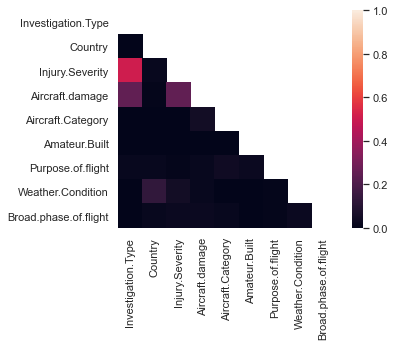

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

## (ii) Random Forest Classification to find how the variables are related

In [45]:
aviation['Aircraft.Category'] = aviation['Aircraft.Category'].astype('category')
aviation['Aircraft.Category_cat'] = aviation['Aircraft.Category'].cat.codes
aviation['Amateur.Built'] = aviation['Amateur.Built'].astype('category')
aviation['Amateur.Built_cat'] = aviation['Amateur.Built'].cat.codes
aviation['Purpose.of.flight'] = aviation['Purpose.of.flight'].astype('category')
aviation['Purpose.of.flight_cat'] = aviation['Purpose.of.flight'].cat.codes
aviation['Broad.phase.of.flight'] = aviation['Broad.phase.of.flight'].astype('category')
aviation['Broad.phase.of.flight_cat'] = aviation['Broad.phase.of.flight'].cat.codes
aviation['Weather.Condition'] = aviation['Weather.Condition'].astype('category')
aviation['Weather.Condition_cat'] = aviation['Weather.Condition'].cat.codes
aviation['Engine.Type'] = aviation['Engine.Type'].astype('category')
aviation['Engine.Type_cat'] = aviation['Engine.Type'].cat.codes
aviation['Injury.Severity'] = aviation['Injury.Severity'].astype('category')
aviation['Injury.Severity_cat'] = aviation['Injury.Severity'].cat.codes
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].astype('category')
aviation['Aircraft.damage_cat'] = aviation['Aircraft.damage'].cat.codes
aviation.sample(n=10)

Event.Id Investigation.Type Accident.Number  \
Event.Date                                                      
2013-03-15  20130315X82522           Accident      ERA13FA168   
2009-05-06  20090507X23704           Accident      CEN09CA282   
2008-04-06  20080522X00711           Accident      NYC08CA154   
2015-11-04  20151119X94022           Accident      GAA16CA052   
2016-02-20  20160221X82226           Accident      ERA16LA109   
2016-11-10  20161121X24021           Accident      GAA17CA073   
2011-02-21  20110228X93029           Accident      CEN11CA208   
1982-11-10  20020917X04562           Accident      DEN83LA016   
1990-06-15  20001212X23515           Accident      NYC90FA130   
1982-02-05  20020917X02570           Accident      NYC82FNE03   

                        LOCATION        Country   Latitude   Longitude  \
Event.Date                                                               
2013-03-15   Fort Lauderdale, FL  United States  26.191666  -80.156111   
2009-05-06          SEMINOLE, OK  United States  35.274723  -96.675000   
2008-04-06         ALABASTER, AL  United States  33.176945  -86.782778   
2015-11-04             ALCOA, TN  United States  35.812500  -83.987777   
2016-02-20    PORT JEFFERSON, NY  United States  40.961111  -73.084444   
2016-11-10         HURRICANE, UT  United States  37.137500 -113.306944   
2011-02-21  PROSPECT HEIGHTS, IL  United States  42.114167  -87.901389   
1982-11-10            BEULAH, ND  United States        NaN         NaN   
1990-06-15           DANBURY, CT  United States        NaN         NaN   
1982-02-05         ELLINGTON, CT  United States        NaN         NaN   

           Airport.Code                Airport.Name Injury.Severity  \
Event.Date                                                            
2013-03-15          FXE   Fort Lauderdale Executive           Fatal   
2009-05-06          SRE  Seminole Municipal Airport       Non-Fatal   
2008-04-06          EET       Shelby County Airport       Non-Fatal   
2015-11-04          TYS               MC GHEE TYSON       Non-Fatal   
2016-02-20          NaN                         NaN           Fatal   
2016-11-10          1L8    GENERAL DICK STOUT FIELD       Non-Fatal   
2011-02-21          PWK   Chicago Executive Airport       Non-Fatal   
1982-11-10          95D                 BEULAH MUNI       Non-Fatal   
1990-06-15          NaN                         NaN           Fatal   
1982-02-05          NaN                   ELLINGTON       Non-Fatal   

           Aircraft.damage Aircraft.Category Registration.Number  \
Event.Date                                                         
2013-03-15       Destroyed          Airplane               N63CA   
2009-05-06     Substantial          Airplane              N7271J   
2008-04-06     Substantial          Airplane                N7UX   
2015-11-04     Substantial          Airplane              N905CP   
2016-02-20     Substantial          Airplane              N29099   
2016-11-10     Substantial          Airplane              N1028Q   
2011-02-21     Substantial          Airplane               N12LK   
1982-11-10     Substantial          Airplane              N739FZ   
1990-06-15     Substantial          Airplane               N76KK   
1982-02-05     Substantial          Airplane              N721FL   

                                     Make             Model Amateur.Built  \
Event.Date                                                                  
2013-03-15                          Piper            PA-31T            No   
2009-05-06                          Piper         PA-28-140            No   
2008-04-06  American Aviation Corp. (aac)             AA-1A            No   
2015-11-04                         Cessna              172S            No   
2016-02-20                          Piper              PA28            No   
2016-11-10               Carter Richard L  BUDDY BABY LAKES           Yes   
2011-02-21                          Beech                58   

In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(aviation, test_size=0.2, random_state = 4)

#### Case 1) Where Injury.Severity is the 'y' variable

In [94]:
train_x = np.asanyarray(train[['Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
train_y = np.asanyarray(train[['Injury.Severity_cat']])
test_x = np.asanyarray(test[['Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
test_y = np.asanyarray(test[['Injury.Severity_cat']])

In [95]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(train_x, train_y)
pred_y = RF.predict(test_x)

<ipython-input-95-21a025484bf3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(train_x, train_y)


In [96]:
from sklearn import metrics
round(RF.score(train_x,train_y), 4)
print("Accuracy of the Model:",metrics.accuracy_score(test_y, pred_y))

Accuracy of the Model: 0.8366659650599874


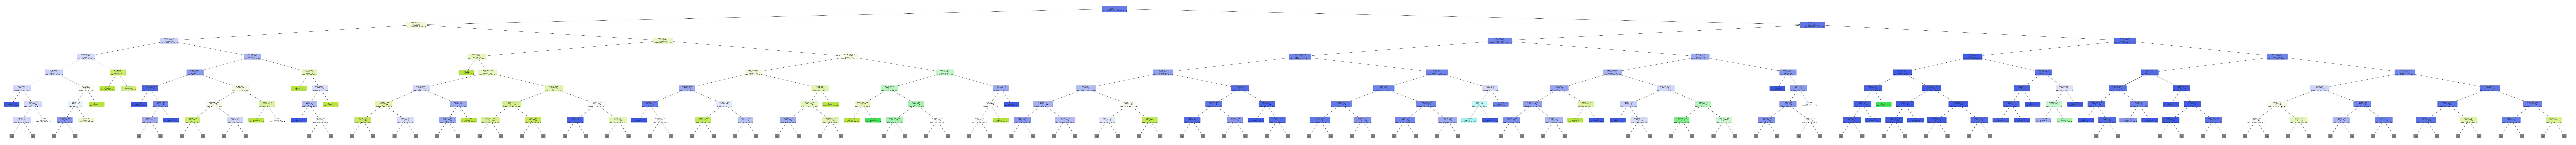

In [97]:
# Extract single tree
estimator = RF.estimators_[5]

# Plotting the tree
from sklearn import tree
plt.figure(figsize=(350,20))  
_ = tree.plot_tree(estimator, max_depth=7, feature_names = ['AC.dmg','AC.cat','Amat.Built','Purp.of.F','BP.of.F','Weat.Cond','Eng.Type'], 
             filled=True, fontsize=10, rounded = True)

#### Case 2) Where Aircraft.damage is the 'y' variable

In [50]:
train_x = np.asanyarray(train[['Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
train_y = np.asanyarray(train[['Aircraft.damage_cat']])
test_x = np.asanyarray(test[['Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
test_y = np.asanyarray(test[['Aircraft.damage_cat']])

In [51]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(train_x, train_y)
pred_y = RF.predict(test_x)

<ipython-input-51-21a025484bf3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(train_x, train_y)


In [52]:
from sklearn import metrics
round(RF.score(train_x,train_y), 4)
print("Accuracy of the Model:",metrics.accuracy_score(test_y, pred_y))

Accuracy of the Model: 0.8575036834350663


#### Case 3) Where Aircraft.damage is used as one of the 'x' variables for 'y' Injury.Severity

In [87]:
train_x = np.asanyarray(train[['Aircraft.damage_cat','Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
train_y = np.asanyarray(train[['Injury.Severity_cat']])
test_x = np.asanyarray(test[['Aircraft.damage_cat','Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
test_y = np.asanyarray(test[['Injury.Severity_cat']])

In [88]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(train_x, train_y)
pred_y = RF.predict(test_x)

<ipython-input-88-21a025484bf3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(train_x, train_y)


In [89]:
from sklearn import metrics
round(RF.score(train_x,train_y), 4)
print("Accuracy of the Model:",metrics.accuracy_score(test_y, pred_y))

Accuracy of the Model: 0.864239107556304


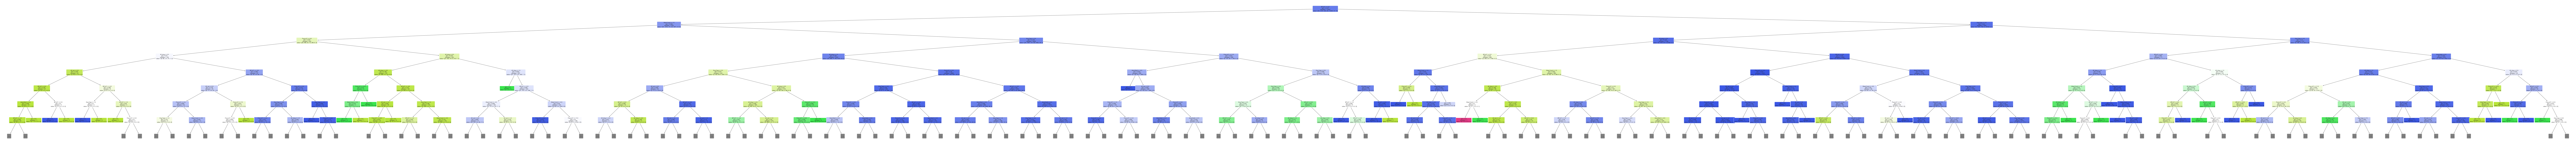

#### Case 4) Where Injury.Severity is used as one of the 'x' variables for 'y' Aircraft.damage

In [56]:
train_x = np.asanyarray(train[['Injury.Severity_cat','Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
train_y = np.asanyarray(train[['Aircraft.damage_cat']])
test_x = np.asanyarray(test[['Injury.Severity_cat','Aircraft.Category_cat','Amateur.Built_cat','Purpose.of.flight_cat','Broad.phase.of.flight_cat','Weather.Condition_cat','Engine.Type_cat']])
test_y = np.asanyarray(test[['Aircraft.damage_cat']])

In [57]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(train_x, train_y)
pred_y = RF.predict(test_x)

<ipython-input-57-21a025484bf3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(train_x, train_y)


In [58]:
from sklearn import metrics
round(RF.score(train_x,train_y), 4)
print("Accuracy of the Model:",metrics.accuracy_score(test_y, pred_y))

Accuracy of the Model: 0.8785518838139339
